In [1]:
import abtem
import numpy as np
import matplotlib.pyplot as plt

In [111]:
energy = 300e3
semiangle_cutoff = 6
extent = [100,100]
sampling = [0.2,0.2]


bullseye = abtem.transfer.Bullseye(
    num_spokes = 3, 
    num_rings = 2, 
    spoke_width = 30,
    ring_width = 1,
    semiangle_cutoff = semiangle_cutoff, 
    energy = energy,
    extent = extent, 
    sampling = sampling
)

probe = abtem.Probe(
    energy = energy,
    extent = extent,
    sampling = sampling,
    aperture = bullseye, 
    semiangle_cutoff = semiangle_cutoff
)

[########################################] | 100% Completed |  0.1s


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

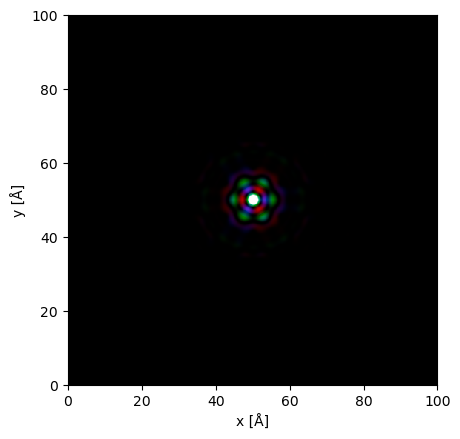

In [112]:
probe.build().complex_images().show(vmax = 3e-5)

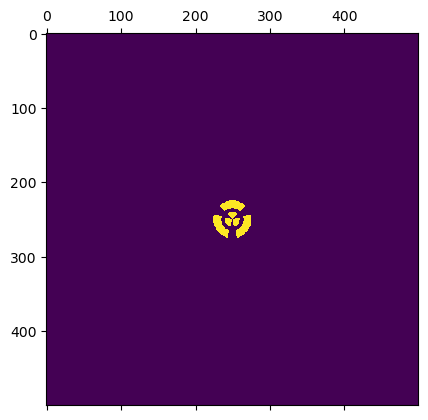

In [113]:
plt.matshow(np.fft.fftshift(probe.aperture.evaluate()))

In [114]:
import abtem
from ase.build import surface
from ase.io import read


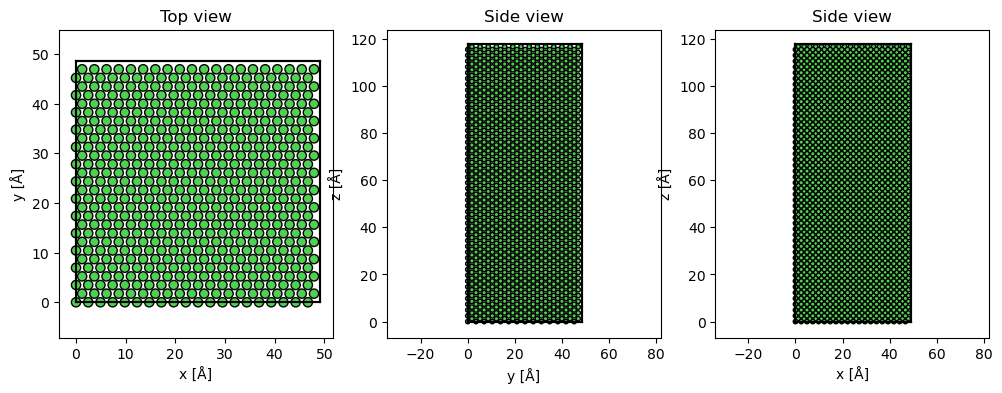

In [115]:
Ni_atoms = read("Ni.cif")
Ni_atoms = surface(Ni_atoms, (1, 1, 0), 4, periodic=True) 
repetitions = (10,14,12)
Ni_atoms *=repetitions

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

abtem.show_atoms(Ni_atoms, ax=ax1, title='Top view')
abtem.show_atoms(Ni_atoms, ax=ax2, plane='yz', title='Side view')
abtem.show_atoms(Ni_atoms, ax=ax3, plane='xz', title='Side view');


In [116]:
frozen_phonons = abtem.inelastic.phonons.FrozenPhonons(Ni_atoms, 12, 0.1)
potential = abtem.Potential(
    frozen_phonons,
    sampling = 0.2, 
    projection = "infinite", 
    parametrization = "kirkland", 
    slice_thickness = 1,
)

In [117]:
scan_end = (potential.extent[0] / repetitions[0], potential.extent[1] / repetitions[1])

gridscan = abtem.GridScan(start=[0, 0], end=scan_end, sampling=1)

detector = abtem.detectors.PixelatedDetector(max_angle='valid', resample='uniform')
measurement = probe.scan(
    scan = gridscan, 
    detectors = detector, 
    potential = potential, 
)

[########################################] | 100% Completed | 22.2s


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

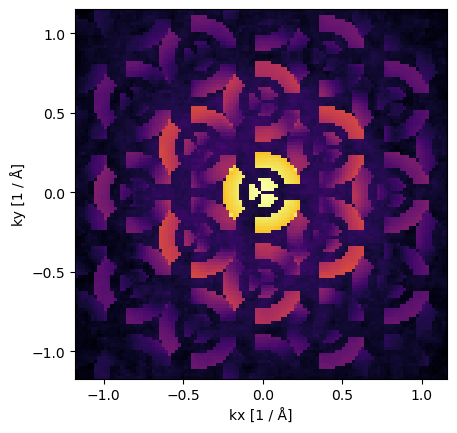

In [118]:
measurement[0, 0].show(cmap='inferno',power = 0.2)
    


In [5]:
energy = 300e3
semiangle_cutoff = 6
extent = [100,100]
sampling = [0.2,0.2]


vortex = abtem.transfer.Vortex(
    quantum_number = 4,
    semiangle_cutoff = semiangle_cutoff, 
    energy = energy,
    extent = extent, 
    sampling = sampling
)

probe_vortex = abtem.Probe(
    energy = energy,
    extent = extent,
    sampling = sampling,
    aperture = vortex, 
    semiangle_cutoff = semiangle_cutoff
)

[########################################] | 100% Completed |  0.1s


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

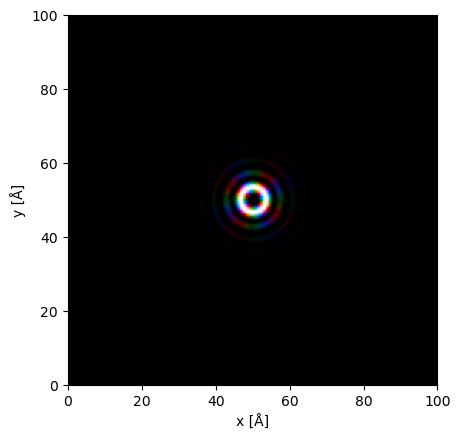

In [6]:
probe_vortex.build().complex_images().show()